In [1]:
# Import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv('market_data.csv')
# Display the first few rows of the dataset
print(data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [2]:
# Handle missing values
data = data.dropna()
# Convert categorical columns to numerical (if any)
data = pd.get_dummies(data, drop_first=True)
# Split the data into features and target variable
# The original error was due to 'Market_Size' not being in the dataframe.
# Using 'Close' as the target variable, which is a common target for market data.
X = data.drop('Close', axis=1)
y = data['Close']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

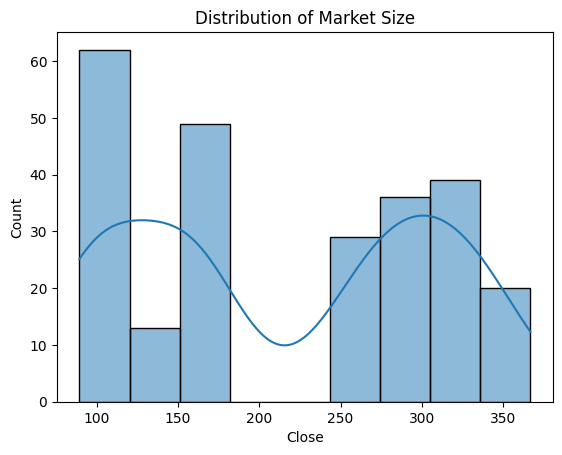

In [3]:
# Visualize the distribution of the target variable
sns.histplot(y, kde=True)
plt.title('Distribution of Market Size')
plt.show()

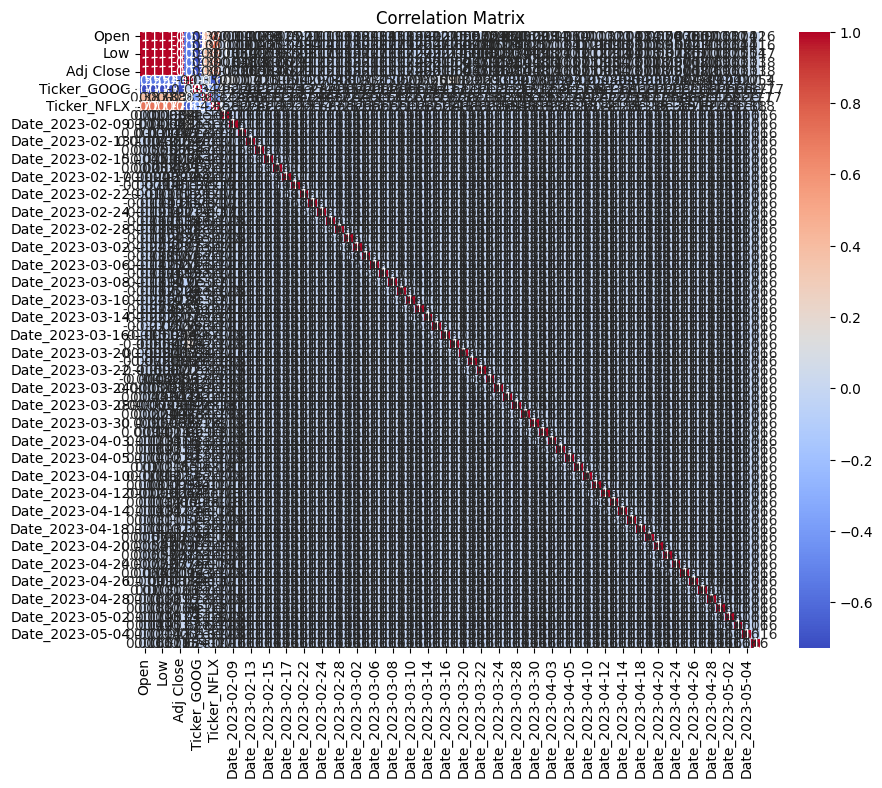

In [4]:
# Visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Install missing package and its successor
!pip install ydata-profiling scikeras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import ProfileReport from ydata_profiling (successor to pandas_profiling)
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import LocalOutlierFactor
from numpy import ma
import math
import matplotlib
from matplotlib.pyplot import figure
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
%matplotlib inline
from scipy.stats import multivariate_normal
from sklearn.metrics import (
    f1_score, confusion_matrix,
    classification_report, precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras.utils import to_categorical
from keras.datasets import imdb
#from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer # Updated import path
from keras import (
    models, regularizers, layers, optimizers,
    losses, metrics
)
from keras.optimizers import Adam
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from scikeras.wrappers import KerasClassifier # Updated import path
import keras.backend as K

In [8]:
data = pd.read_csv('market_data.csv')

In [9]:
data.head(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


In [11]:
data['Ticker'].unique()
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [13]:
data.shape

(248, 8)

In [14]:
data.dtypes

,0
Ticker,object
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [15]:
data.describe

<bound method NDFrame.describe of     Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  64120100  
2    150.639999  56007100  
3    151.009995  57450700  
4    153.850006  62199000  
..          ...       ...  
243  107.709999  20926300  
244  105.980003  20343100  
245  106.120003  17116300  
246  105.209999  19780600  
247  106.214996  20705300  

[248 rows x 8 columns]>

In [18]:
data.isnull().any()

,0
Ticker,False
Date,False
Open,False
High,False
Low,False
Close,False
Adj Close,False
Volume,False


In [21]:
data.isnull() .sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [24]:
data.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999626,0.999650,0.999176,0.999173,-0.547741
High,0.999626,1.000000,0.999654,0.999644,0.999640,-0.546175
Low,0.999650,0.999654,1.000000,0.999663,0.999661,-0.544590
Close,0.999176,0.999644,0.999663,1.000000,0.999999,-0.544194
Adj Close,0.999173,0.999640,0.999661,0.999999,1.000000,-0.544370
Volume,-0.547741,-0.546175,-0.544590,-0.544194,-0.544370,1.000000


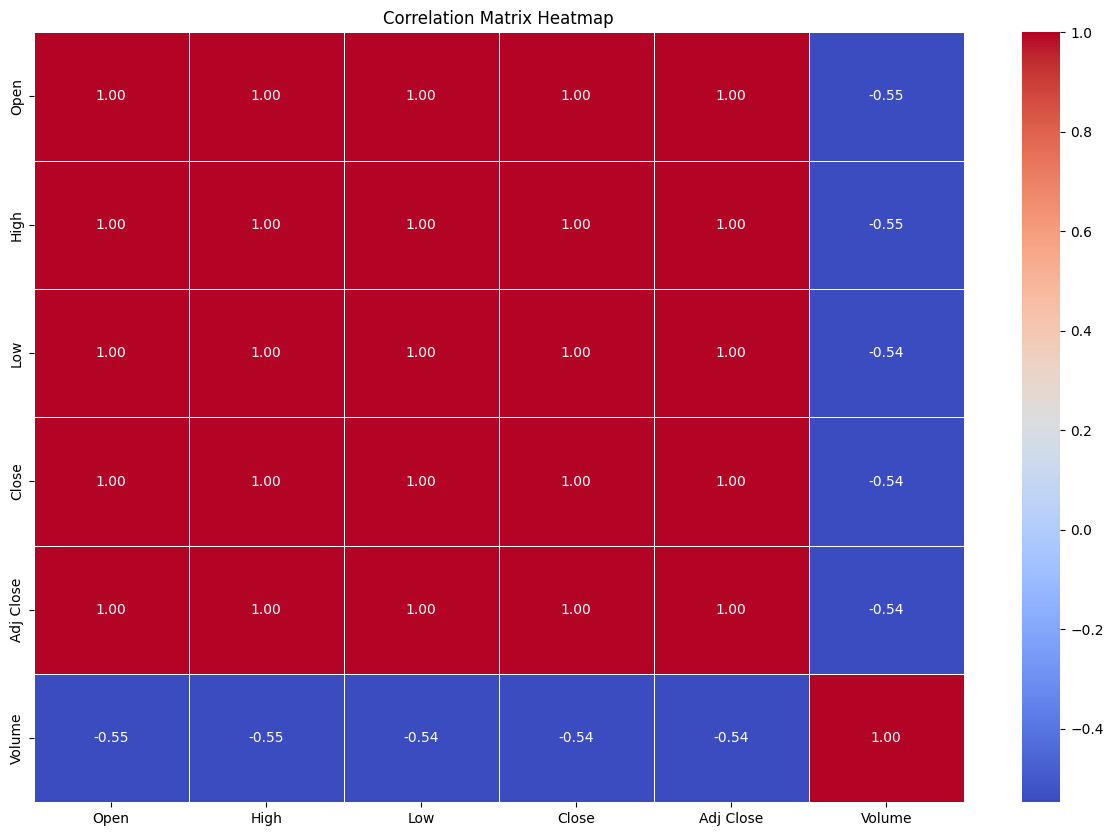

In [26]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [28]:
profile= ProfileReport(data, title="Stock Market Analysis")
profile
data['Date'] = pd.to_datetime(data['Date'])

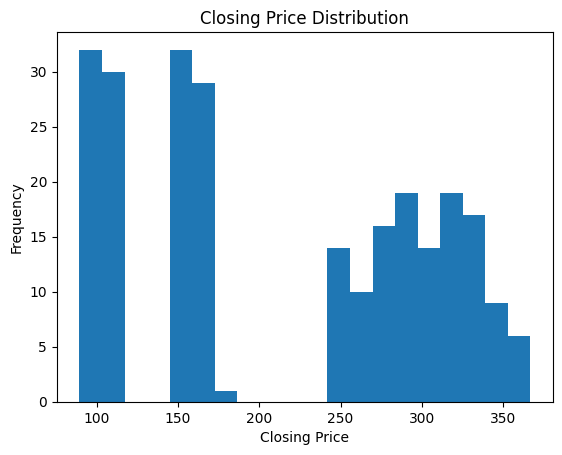

In [30]:
# the distribution of the closing prices to understand their
# range and frequency.
plt.hist(data['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

Text(0.5, 1.0, 'Total Volume by Ticker')

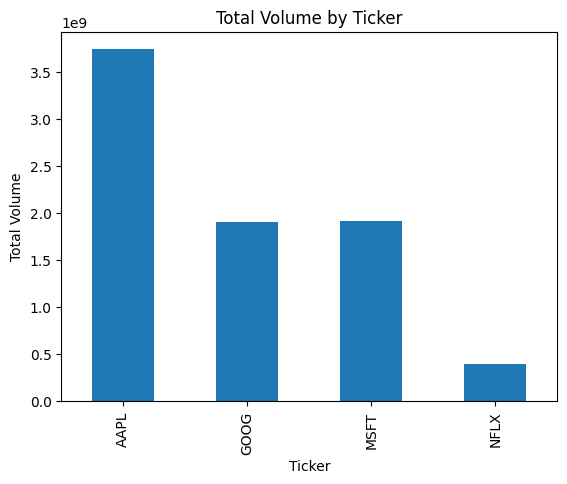

In [32]:
#the cumulative volume traded over time to observe any trends or
#spikes.
ticker_volume = data.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')

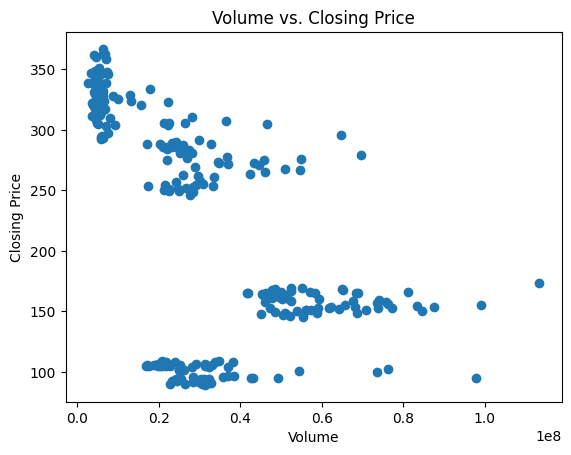

In [34]:
#Exploring the relationship between volume and closing prices,
#to identify any correlations.
plt.scatter(data['Volume'], data['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

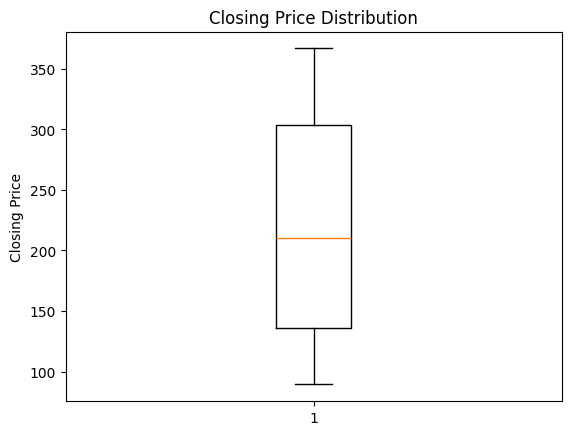

In [36]:
#Illustrating the distribution of the closing prices, including
#the median, quartiles, and outliers.
plt.boxplot(data['Close'])
plt.ylabel('Closing Price')
plt.title('Closing Price Distribution')
plt.show()

In [37]:
data.head(5)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
